# Sleep pattern analysis

This is an analysis of different sleep patterns for a near aquintance. Data URL has been redacted.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import io
import requests

plt.rcParams["figure.figsize"]=20,10

DATASET_URL = "redacted"
DAYS = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [2]:
def parse(dates):
    parsed_dates = []
    for date in dates:
        time = date.split(" ")[1]
        hour, _ = time.split(":")
        if int(hour) > 16:
            parsed_date = "2020-01-01 " + time
        else:
            parsed_date = "2020-01-02 " + time
        parsed_dates.append(parsed_date)
    return parsed_dates

data=requests.get(DATASET_URL).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')))
df["bed_time"] = parse(df["bed_time"])
df["bed_time"] = df["bed_time"].astype("datetime64")
df['day'] = pd.Categorical(df['day'], categories=DAYS,ordered=True)

df

,Unnamed: 0,date,bed_time,hours_to_fall_asleep,hours_awake_during_night,wakeup_time,leave_bed_time,day,hours_in_bed,hours_asleep,minutes_in_bed_after_wakeup,lunar_phase
0,0,2022-01-28,2020-01-01 22:00:00,1.0,1.0,2022-01-28 6:30,2022-01-28 6:45,Friday,8,6.0,15,0.231509
1,1,2022-01-29,2020-01-01 21:30:00,1.2,0.0,2022-01-29 6:20,2022-01-29 7:30,Saturday,10,8.8,10,0.139950
2,2,2022-01-30,2020-01-01 23:30:00,0.5,1.0,2022-01-30 8:50,2022-01-30 8:50,Sunday,9,7.5,0,0.068206
3,3,2022-01-31,2020-01-01 22:30:00,1.0,0.0,2022-01-31 7:00,2022-01-31 7:10,Monday,8,7.0,10,0.021331
4,4,2022-02-01,2020-01-01 22:20:00,1.0,0.3,2022-02-01 6:30,2022-02-01 7:00,Tuesday,8,6.7,30,0.002202
...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,2022-07-30,2020-01-01 22:28:00,0.6,0.0,2022-07-30 7:01,2022-07-30 7:05,Saturday,8,7.4,4,0.018104
180,180,2022-07-31,2020-01-01 22:24:00,0.8,0.0,2022-07-31 6:47,2022-07-31 6:53,Sunday,8,7.2,6,0.052025
181,181,2022-08-01,2020-01-01 22:28:00,1.2,0.7,2022-08-01 7:02,2022-08-01 7:08,Monday,8,6.1,6,0.103780
182,182,2022-08-02,2020-01-01 22:23:00,2.2,0.3,2022-08-02 6:45,2022-08-02 6:48,Tuesday,8,5.5,3,0.172120


# General

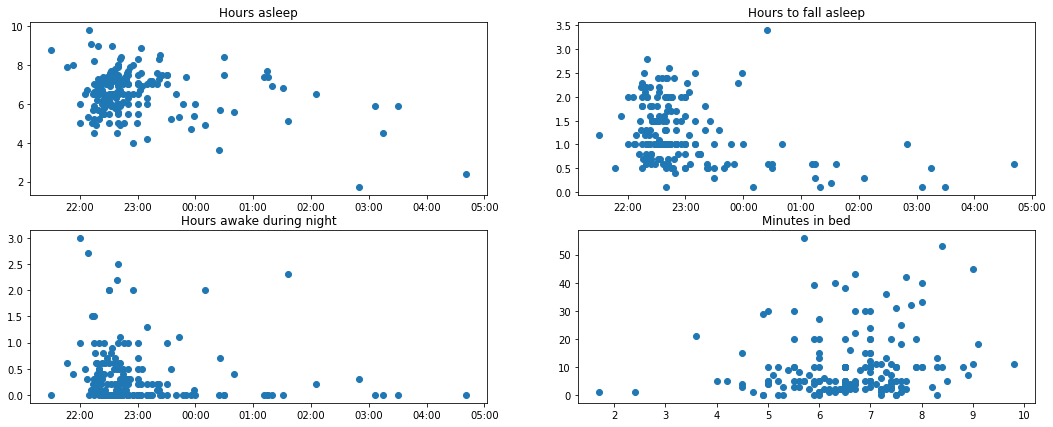

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))
ax1.plot_date(df["bed_time"], df["hours_asleep"], xdate=True, ydate=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.set_title("Hours asleep")

ax2.plot_date(df["bed_time"], df["hours_to_fall_asleep"], xdate=True, ydate=False)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.set_title("Hours to fall asleep")

ax3.plot_date(df["bed_time"], df["hours_awake_during_night"], xdate=True, ydate=False)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.set_title("Hours awake during night")

ax4.scatter(df["hours_asleep"], df["minutes_in_bed_after_wakeup"])
ax4.set_title("Minutes in bed")
plt.show()

# Breakdown by weekday

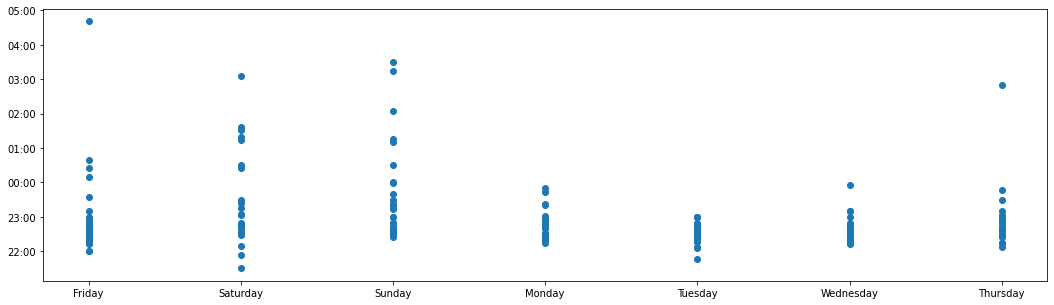

In [4]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))
ax1.plot_date(df["day"], df["bed_time"], xdate=False, ydate=True)
ax1.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.set_title("Bedtime")
plt.show()

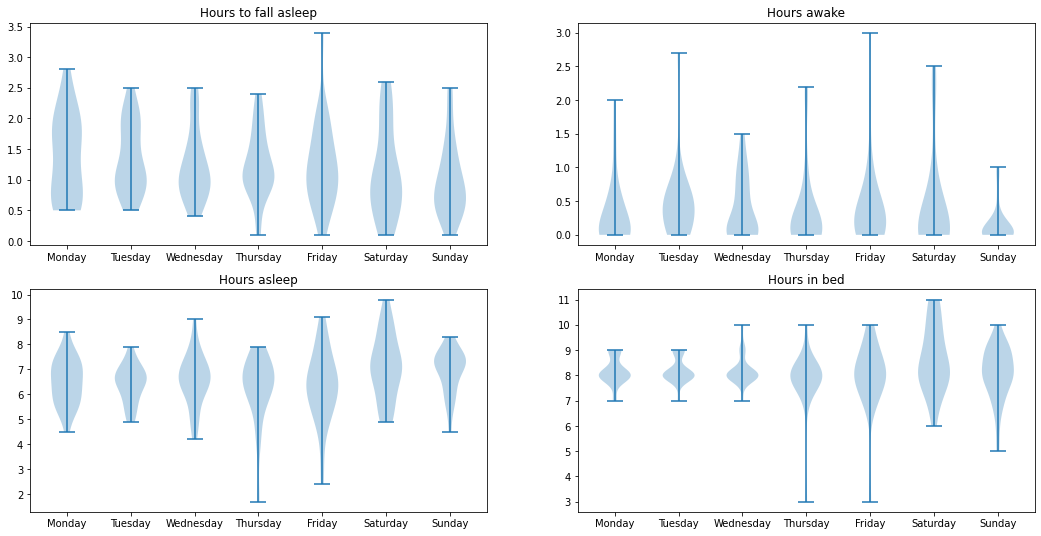

In [5]:
def get_day_violin_data(field):
    data = {}
    for day in DAYS:
        data[day] = df[df["day"] == day][field]
    return data.values()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))
ax1.violinplot(get_day_violin_data("hours_to_fall_asleep"))
ax1.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax1.set_xticklabels(DAYS)
ax1.set_title("Hours to fall asleep")

ax2.violinplot(get_day_violin_data("hours_awake_during_night"))
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax2.set_xticklabels(DAYS)
ax2.set_title("Hours awake")

ax3.violinplot(get_day_violin_data("hours_asleep"))
ax3.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax3.set_xticklabels(DAYS)
ax3.set_title("Hours asleep")

ax4.violinplot(get_day_violin_data("hours_in_bed"))
ax4.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax4.set_xticklabels(DAYS)
ax4.set_title("Hours in bed")

plt.show()

# Breakdown by lunar cycle

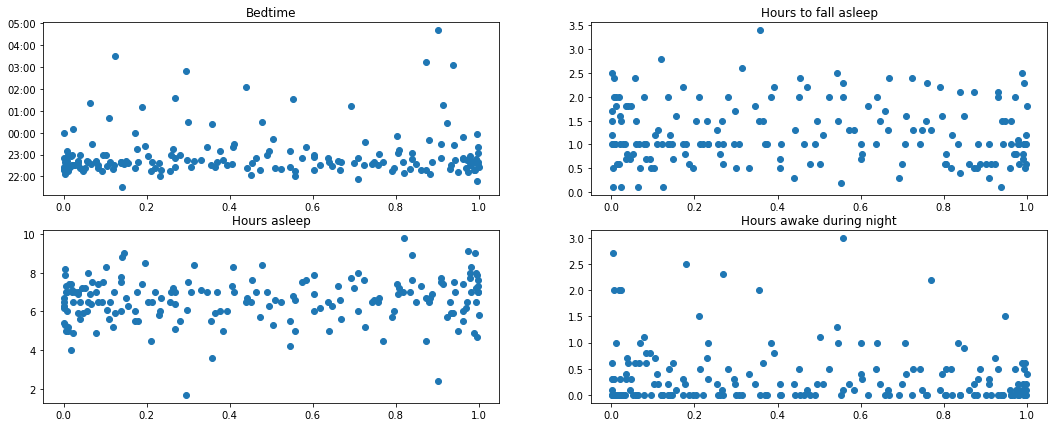

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 7))
ax1.plot_date(df["lunar_phase"], df["bed_time"], xdate=False, ydate=True)
ax1.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.set_title("Bedtime")

ax2.scatter(df["lunar_phase"], df["hours_to_fall_asleep"])
ax2.set_title("Hours to fall asleep")

ax3.scatter(df["lunar_phase"], df["hours_asleep"])
ax3.set_title("Hours asleep")

ax4.scatter(df["lunar_phase"], df["hours_awake_during_night"])
ax4.set_title("Hours awake during night")
plt.show()